## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 70297 files belonging to 38 classes.


## validating image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 17574 files belonging to 38 classes.


In [4]:
for x,y in training_set :
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[113.75 113.75 137.75]
   [106.   106.   130.  ]
   [101.25 101.25 125.25]
   ...
   [143.5  145.5  168.5 ]
   [155.   157.   180.  ]
   [135.5  137.5  160.5 ]]

  [[106.25 106.25 130.25]
   [ 81.    81.   105.  ]
   [ 99.    99.   123.  ]
   ...
   [121.5  123.5  146.5 ]
   [133.5  135.5  158.5 ]
   [115.75 117.75 140.75]]

  [[107.75 107.75 131.75]
   [ 96.    96.   120.  ]
   [108.5  108.5  132.5 ]
   ...
   [114.25 116.25 139.25]
   [120.5  122.5  142.5 ]
   [135.   137.   160.  ]]

  ...

  [[ 81.75  76.75  96.75]
   [ 89.75  84.75 104.75]
   [ 92.25  87.25 107.25]
   ...
   [101.75 102.75 123.75]
   [119.   120.   141.  ]
   [ 97.5   98.5  119.5 ]]

  [[ 88.5   83.5  103.5 ]
   [ 87.25  82.25 102.25]
   [ 95.    90.   110.  ]
   ...
   [108.25 109.25 130.25]
   [123.   124.   145.  ]
   [130.5  131.5  152.5 ]]

  [[ 81.    76.    96.  ]
   [ 90.75  85.75 105.75]
   [112.   107.   127.  ]
   ...
   [112.   113.   134.  ]
   [129.75 130.75 151.75]
   [119.25 120.25 14

### Building Model


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

## Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\neera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
##output layer
model.add(Dense(units=38,activation='softmax'))

## compiling model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Class Names


In [19]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3974s 2s/step - accuracy: 0.4061 - loss: 2.0991 - val_accuracy: 0.8411 - val_loss: 0.4999
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3824s 2s/step - accuracy: 0.8325 - loss: 0.5263 - val_accuracy: 0.9120 - val_loss: 0.2734
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3810s 2s/step - accuracy: 0.9061 - loss: 0.2923 - val_accuracy: 0.9316 - val_loss: 0.2077
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3815s 2s/step - accuracy: 0.9316 - loss: 0.2098 - val_accuracy: 0.9470 - val_loss: 0.1668
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3816s 2s/step - accuracy: 0.9530 - loss: 0.1485 - val_accuracy: 0.9534 - val_loss: 0.1440
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3822s 2s/step - accuracy: 0.9644 - loss: 0.1137 - val_accuracy: 0.9619 - val_loss: 0.1222
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6513s 3s/step - accuracy: 0.9691 - loss: 0.0929 - val_accuracy: 0.9571 - val_loss: 0.1364
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8359s 4s/step - accuracy: 0.9734 -

## Model evaluation


In [21]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2841s 1s/step - accuracy: 0.9888 - loss: 0.0331


In [ ]:
print(train_loss,train_acc)

0.03140261024236679 0.9895728230476379


In [ ]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 499s 907ms/step - accuracy: 0.9648 - loss: 0.1224


In [ ]:
print(val_loss,val_acc)

0.12793225049972534 0.96381014585495


# saving model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.601377010345459,
  0.8558544516563416,
  0.915216863155365,
  0.9398124814033508,
  0.9555315375328064,
  0.9647637605667114,
  0.9700840711593628,
  0.9745081663131714,
  0.9799849390983582,
  0.9810376167297363],
 'loss': [1.3505825996398926,
  0.4485893249511719,
  0.2631489634513855,
  0.18426045775413513,
  0.1373841017484665,
  0.10841920226812363,
  0.08943933248519897,
  0.07803475111722946,
  0.06230921670794487,
  0.05936902388930321],
 'val_accuracy': [0.8410720229148865,
  0.9120291471481323,
  0.9316034913063049,
  0.9469671249389648,
  0.9533970355987549,
  0.9618754982948303,
  0.9570956826210022,
  0.9609650373458862,
  0.959656298160553,
  0.96381014585495],
 'val_loss': [0.4999048709869385,
  0.2734447717666626,
  0.2077416628599167,
  0.1667526364326477,
  0.14404211938381195,
  0.12221112102270126,
  0.13644085824489594,
  0.12694762647151947,
  0.145474374294281,
  0.12793225049972534]}

In [ ]:
import json 
with open("Training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

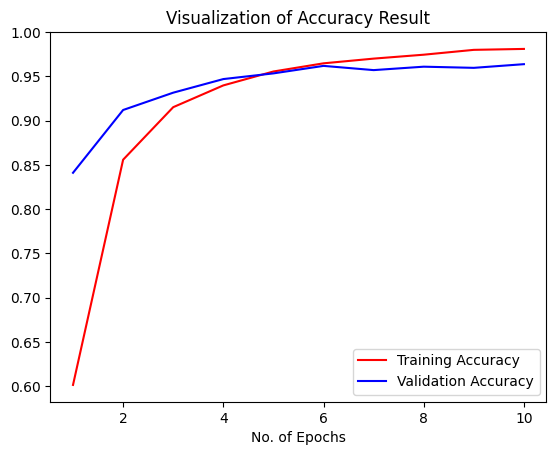

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Testing Model

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 17574 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 416s 757ms/step


array([[9.9999821e-01, 9.4547936e-10, 1.3639074e-09, ..., 1.6288211e-14,
        1.2616148e-13, 3.0286813e-12],
       [9.9996495e-01, 1.0597651e-08, 3.0940545e-10, ..., 4.0665062e-14,
        2.1621215e-13, 7.5813574e-13],
       [1.0000000e+00, 8.2990411e-12, 1.0425206e-11, ..., 2.4806917e-18,
        4.8323648e-16, 7.8582878e-16],
       ...,
       [4.5933244e-13, 1.4370595e-14, 5.6171616e-11, ..., 1.7119241e-13,
        3.9706666e-13, 1.0000000e+00],
       [1.4024795e-11, 2.0237907e-13, 9.4692969e-11, ..., 5.0993537e-12,
        3.5076002e-12, 1.0000000e+00],
       [1.3157045e-15, 1.2076287e-17, 6.7202459e-15, ..., 3.4202627e-15,
        3.7053062e-13, 1.0000000e+00]], dtype=float32)

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17574,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

## Confusion Matrix Visualization

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

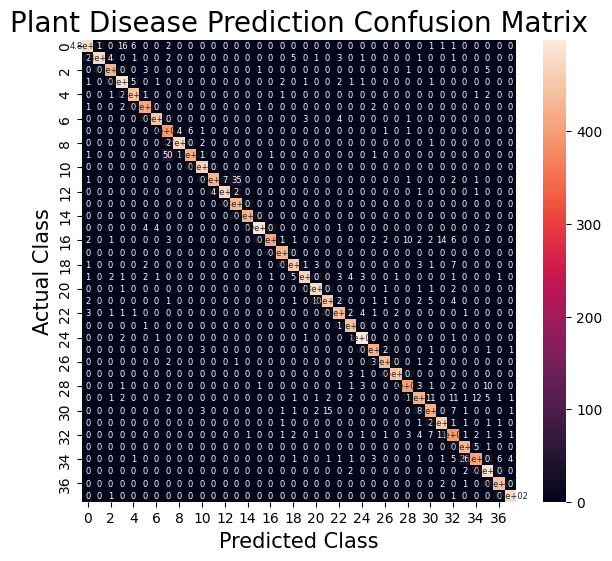

In [46]:
plt.figure(figsize=(7, 6))
sns.heatmap(cm,annot=True,annot_kws={"size": 6})

plt.xlabel('Predicted Class',fontsize = 15)
plt.ylabel('Actual Class',fontsize = 15)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 20)
plt.show()